# Spaceship Titanic - Introduction
### Predict which passengers are transported to an alternate dimension

## Description:
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

## Evaluation:
Metric
Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

## Submission Format
The submission format for the competition is a csv file with the following format:
PassengerId,Transported
0013_01,False
0018_01,False
0019_01,False
0021_01,False
etc.

## Dataset Description:
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

## File and Data Field Descriptions:
### train.csv
Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
	PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

	HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
	CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
	Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
	Destination - The planet the passenger will be debarking to.
	Age - The age of the passenger.
	VIP - Whether the passenger has paid for special VIP service during the voyage.
	RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
	Name - The first and last names of the passenger.
	Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### test.csv
Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

### sample_submission.csv
A submission file in the correct format.

	PassengerId - Id for each passenger in the test set.
	Transported - The target. For each passenger, predict either True or False.

## Imports and data loading

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the train dataset
display(train_data.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data Exploration and Visualization

,Missing Values,Percentage
PassengerId,0,0.000000
HomePlanet,201,2.312205
CryoSleep,217,2.496261
Cabin,199,2.289198
Destination,182,2.093639
Age,179,2.059128
VIP,203,2.335212
RoomService,181,2.082135
FoodCourt,183,2.105142
ShoppingMall,208,2.392730


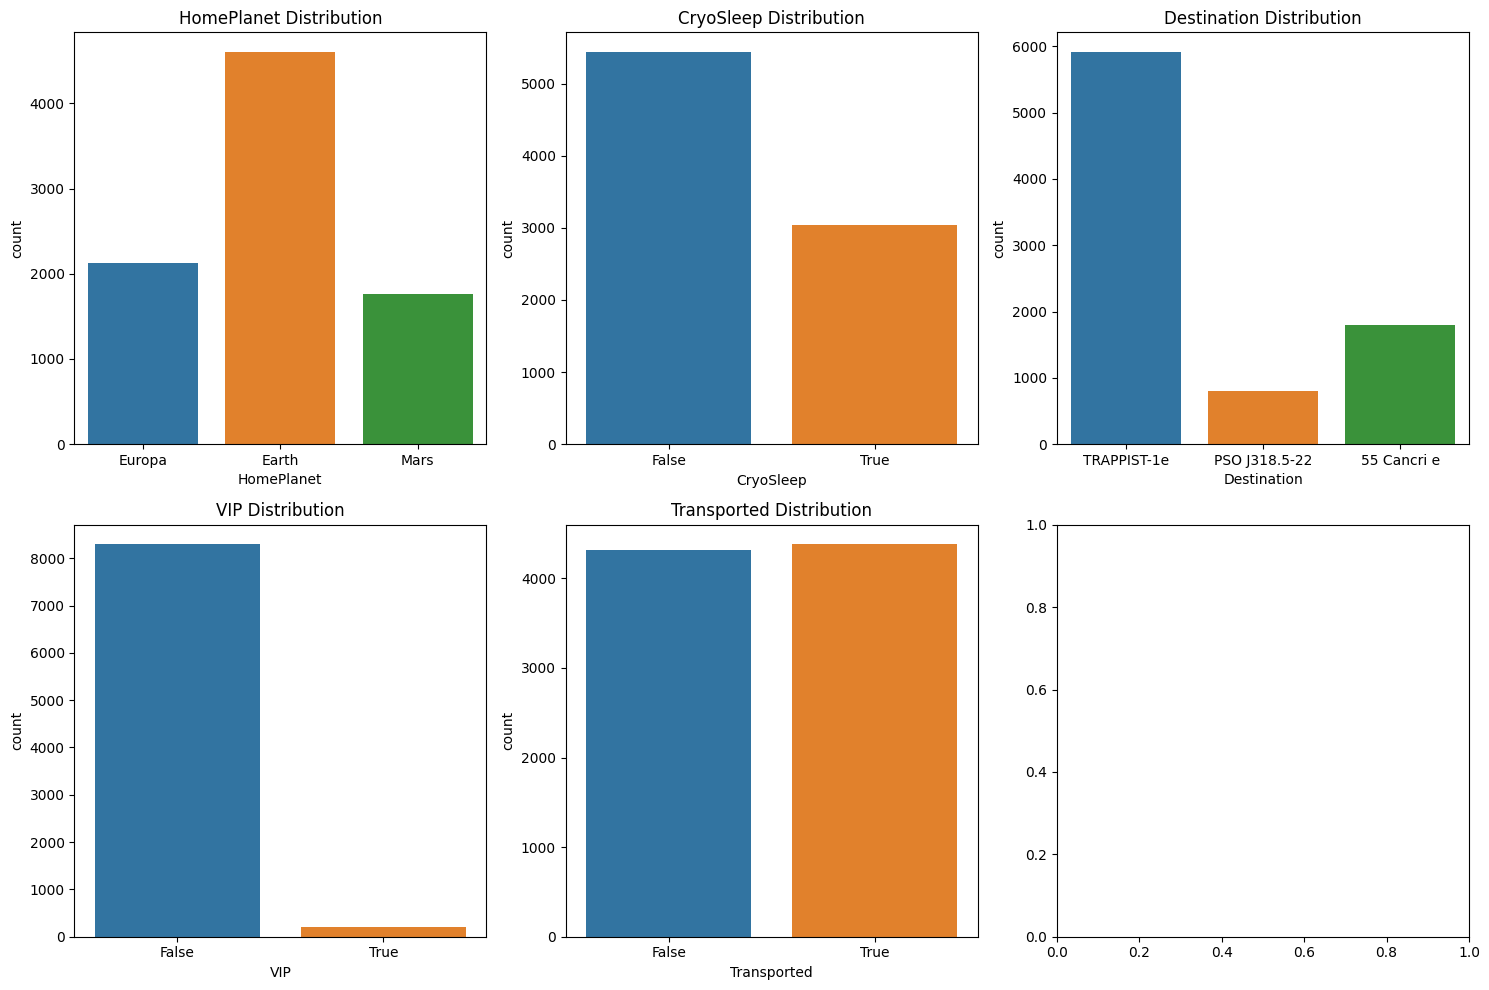

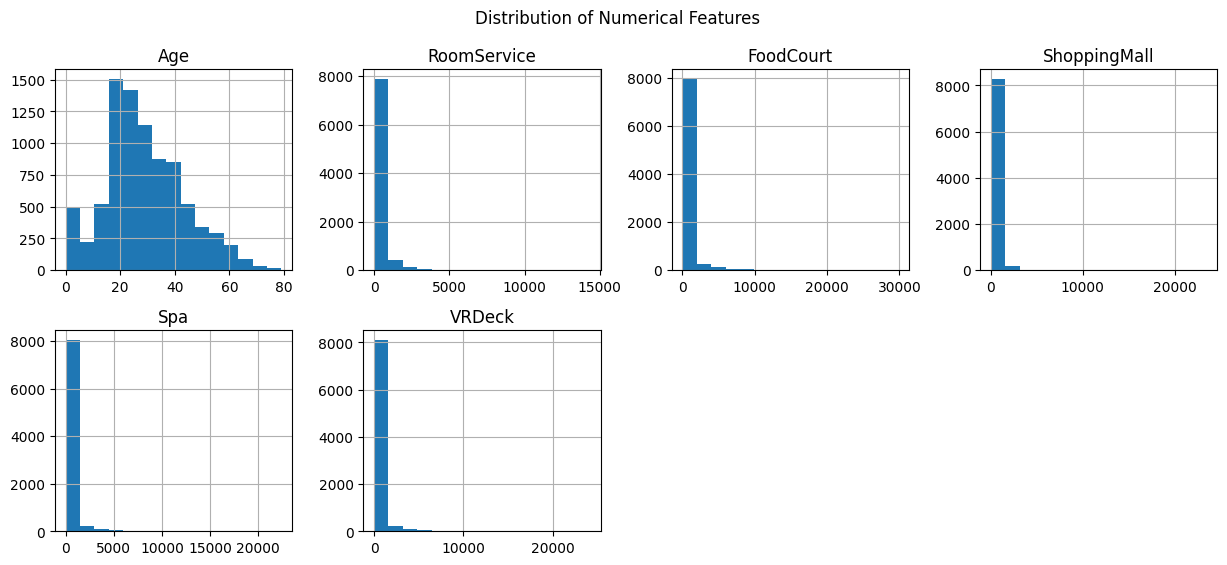

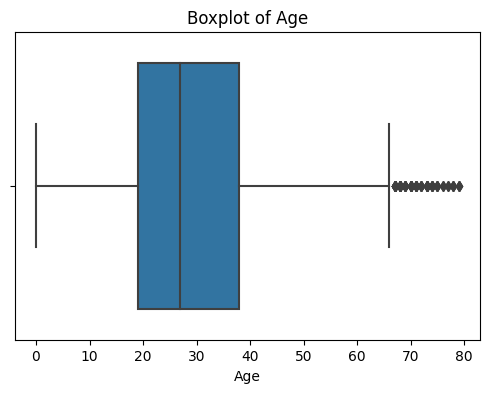

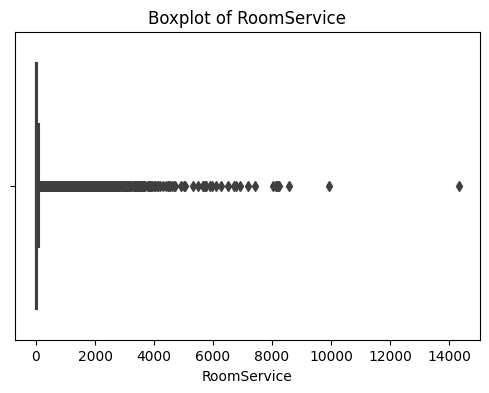

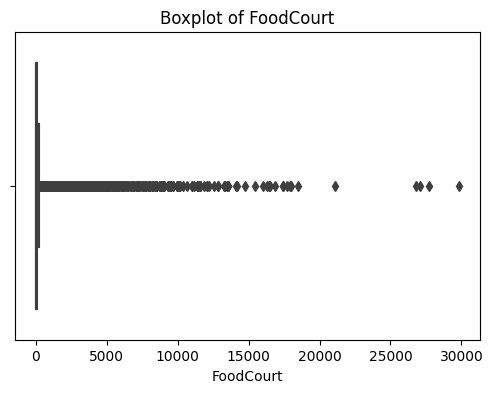

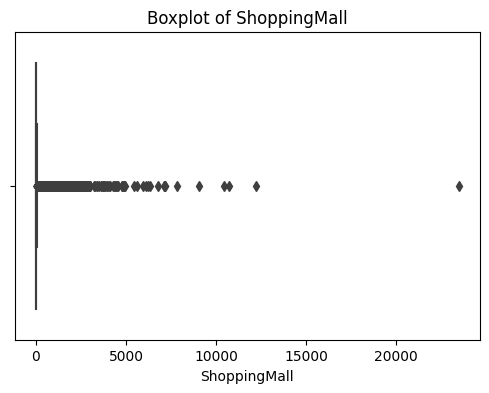

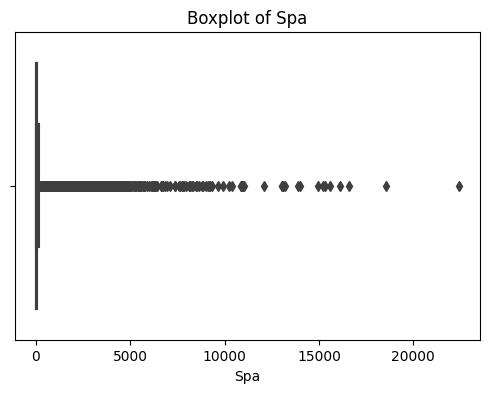

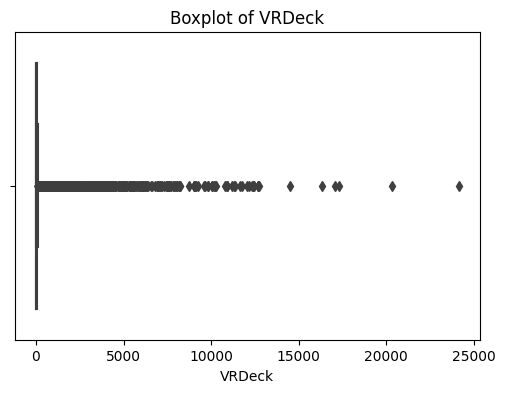

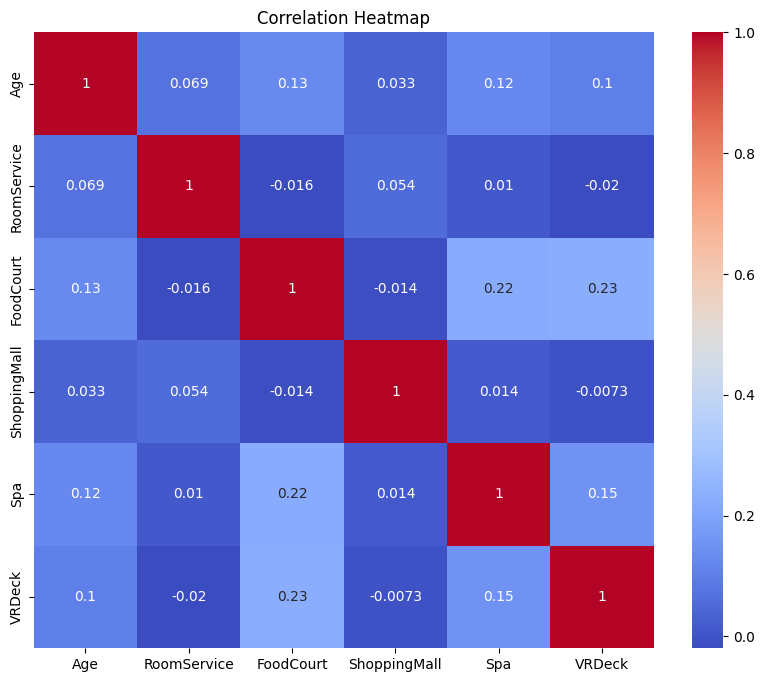

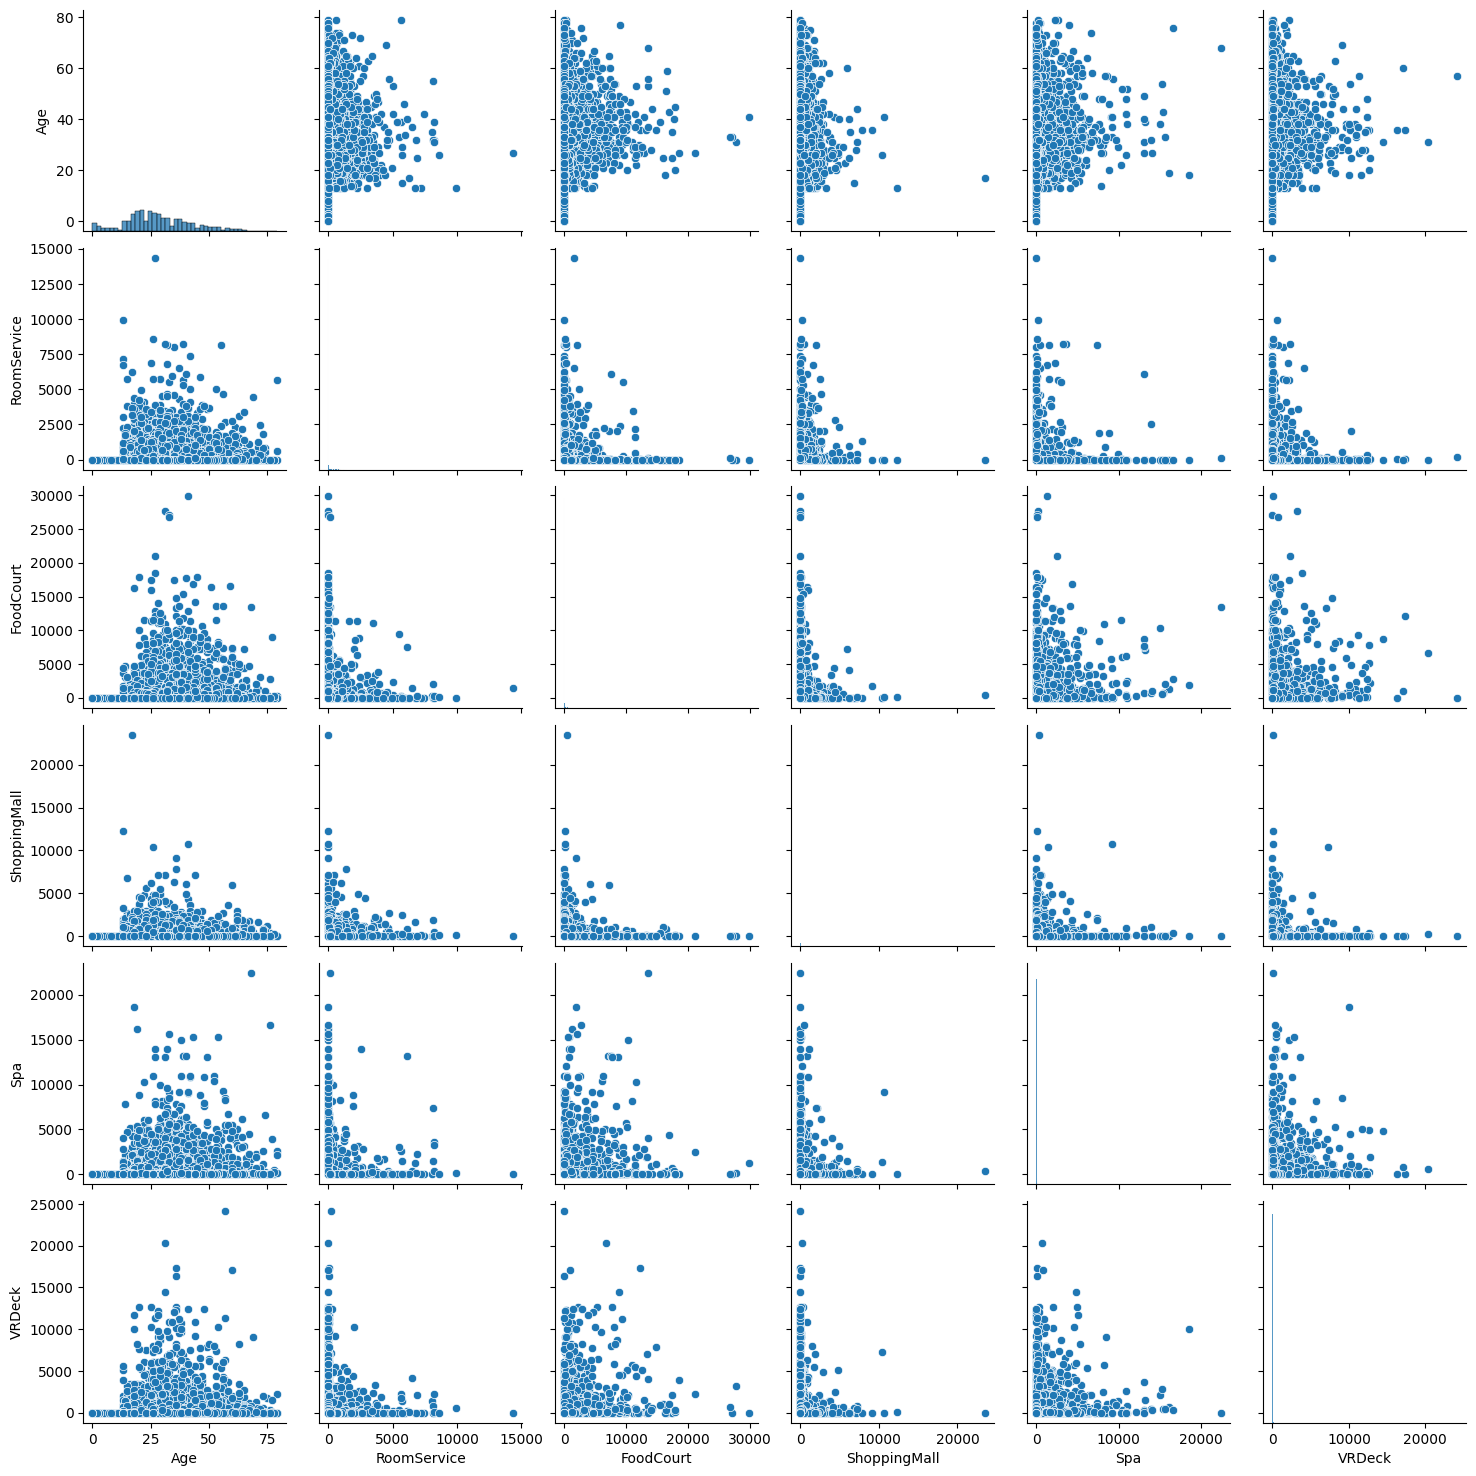

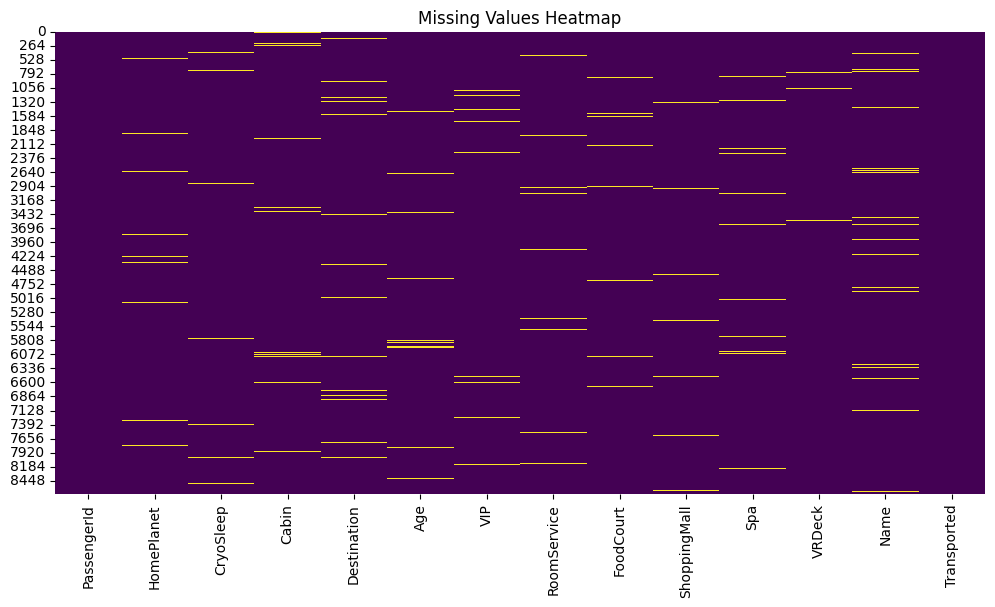

In [ ]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display missing data summary
display(missing_data)

# Visualize the distribution of categorical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.countplot(x='HomePlanet', data=train_data, ax=axes[0,0])
axes[0,0].set_title('HomePlanet Distribution')

sns.countplot(x='CryoSleep', data=train_data, ax=axes[0,1])
axes[0,1].set_title('CryoSleep Distribution')

sns.countplot(x='Destination', data=train_data, ax=axes[0,2])
axes[0,2].set_title('Destination Distribution')

sns.countplot(x='VIP', data=train_data, ax=axes[1,0])
axes[1,0].set_title('VIP Distribution')

sns.countplot(x='Transported', data=train_data, ax=axes[1,1])
axes[1,1].set_title('Transported Distribution')

plt.tight_layout()
plt.show()

# Histograms for Numerical Features
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
train_data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplots for Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=feature, data=train_data)
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pair Plots
sns.pairplot(train_data[numerical_features])
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


## Handling Missing Values...

In [ ]:
# Impute missing values for categorical features with the mode
for column in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

# Impute missing values for numerical features with the median
for column in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    train_data[column].fillna(train_data[column].median(), inplace=True)
    test_data[column].fillna(test_data[column].median(), inplace=True)

# Drop rows where 'Cabin' or 'Name' is missing
train_data.dropna(subset=['Cabin', 'Name'], inplace=True)
test_data.dropna(subset=['Cabin', 'Name'], inplace=True)

# Check the updated missing values
updated_missing_values = train_data.isnull().sum()
display(updated_missing_values)

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

### ... or dropping rows where values are missing

In [ ]:
# Dropping rows where values are missing
train_data.dropna(subset=['Cabin', 'Name', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)
test_data.dropna(subset=['Cabin', 'Name', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)

# Check the updated missing values
updated_missing_values = train_data.isnull().sum()
display(updated_missing_values)

## Feature Engineering

In [ ]:
# Extract information from 'Cabin' column
train_data[['Deck','Num','Side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Deck','Num','Side']] = test_data['Cabin'].str.split('/', expand=True)

# Drop the original 'Cabin' column
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

# One-hot encode categorical variables
train_data = pd.get_dummies(train_data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side'])
test_data = pd.get_dummies(test_data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side'])

# Display the first few rows of the modified train dataset
display(train_data.head())

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Num,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Check for non-numeric columns in the dataset
non_numeric_columns = train_data.select_dtypes(include=['object']).columns.tolist()
print('Non-numeric columns:', non_numeric_columns)

Non-numeric columns: ['PassengerId', 'Name', 'Num']


#### Handling Non-Numeric Columns...

In [ ]:
# Drop 'PassengerId' and 'Name' columns
train_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)

# Convert 'Num' column to numeric
train_data['Num'] = pd.to_numeric(train_data['Num'], errors='coerce')
test_data['Num'] = pd.to_numeric(test_data['Num'], errors='coerce')

# Fill any NaNs that might have been introduced in 'Num' column
train_data['Num'].fillna(train_data['Num'].median(), inplace=True)
test_data['Num'].fillna(test_data['Num'].median(), inplace=True)

# Check the data types again
display(train_data.dtypes)

Age                          float64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                     bool
Num                            int64
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
CryoSleep_False                uint8
CryoSleep_True                 uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
VIP_False                      uint8
VIP_True                       uint8
Deck_A                         uint8
Deck_B                         uint8
Deck_C                         uint8
Deck_D                         uint8
Deck_E                         uint8
Deck_F                         uint8
Deck_G                         uint8
Deck_T                         uint8
Side_P                         uint8
S

#### ... or drop any NaNs that might have been introduced in 'Num' column

In [ ]:
# Handling Non-Numeric Columns

# Drop 'PassengerId' and 'Name' columns
train_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)

# Convert 'Num' column to numeric
train_data['Num'] = pd.to_numeric(train_data['Num'], errors='coerce')
test_data['Num'] = pd.to_numeric(test_data['Num'], errors='coerce')

# Drop any NaNs that might have been introduced in 'Num' column
train_data['Num'].dropna(inplace=True)
test_data['Num'].dropna(inplace=True)

# Check the data types again
display(train_data.dtypes)

## Model training and evaluations

### Machine learning

#### First implementation of identified interesting models
*   Random Forest Classifier
*   Gradient Boosting Classifier



RandomForestClassifier

In [ ]:
# Model Development

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Re-prepare the data for modeling
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']

# Re-split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-initialize and re-train the RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Re-make predictions on the validation set
y_pred = model_rf.predict(X_val)

# Re-calculate the accuracy
accuracy_rf = accuracy_score(y_val, y_pred)
print('Validation Accuracy:', accuracy_rf)

Validation Accuracy: 0.8036144578313253


GradientBoostingClassifier

In [ ]:
# Model Development

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Re-prepare the data for modeling
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']

# Re-split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-initialize and re-train the RandomForestClassifier
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)

# Re-make predictions on the validation set
y_pred = model_gb.predict(X_val)

# Re-calculate the accuracy
accuracy_gb = accuracy_score(y_val, y_pred)
print('Validation Accuracy:', accuracy_gb)

Validation Accuracy: 0.8012048192771084


#### Other considered models

*   Logistic Regression
*   Support Vector Machine
*   K-Nearest Neighbors
*   Decision Tree
*   Naive Bayes







In [ ]:
# Trying Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7861
Support Vector Machine Accuracy: 0.7795
K-Nearest Neighbors Accuracy: 0.7512
Decision Tree Accuracy: 0.7355
Naive Bayes Accuracy: 0.7578


**Since best results are obtained with Random Forest and Gradient Boosting, we will focuse on them for tuning**

#### Hyperparameter Tuning of Random Forest and Gradient Boosting


GradientBoostingClassifier

In [ ]:

from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Tuning Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)
print('Best parameters for Gradient Boosting:', gb_grid_search.best_params_)

# Retrain Gradient Boosting with best parameters
gb_best_params = gb_grid_search.best_params_
gb_optimized = GradientBoostingClassifier(**gb_best_params, random_state=42)
gb_optimized.fit(X_train, y_train)

y_pred = gb_optimized.predict(X_val)
print('Accuracy:', accuracy_score(y_val, y_pred))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Accuracy: 0.8018072289156627


RandomForestClassifier

In [ ]:
# Model Tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters
print('Best parameters:', grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_pred = best_model.predict(X_val)
best_accuracy = accuracy_score(y_val, best_pred)
print('Best Model Accuracy:', best_accuracy)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Model Accuracy: 0.8120481927710843


#### Feature Importance Analysis

Gradient Boosting

In [ ]:
importances = gb_optimized.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Display the feature importances
print(feature_importances)

                           Importance
CryoSleep_True               0.251788
CryoSleep_False              0.112381
VRDeck                       0.108007
Spa                          0.096405
Num                          0.072841
FoodCourt                    0.071276
RoomService                  0.069245
Deck_G                       0.051230
ShoppingMall                 0.043758
Age                          0.035724
Deck_E                       0.019072
HomePlanet_Earth             0.015160
Side_S                       0.013792
HomePlanet_Europa            0.009950
Side_P                       0.007243
Deck_C                       0.006632
Destination_TRAPPIST-1e      0.005174
HomePlanet_Mars              0.004419
Deck_F                       0.001905
Destination_PSO J318.5-22    0.001401
Deck_A                       0.001128
Destination_55 Cancri e      0.001084
VIP_False                    0.000167
Deck_B                       0.000133
VIP_True                     0.000084
Deck_D      

RandomForestClassifier

In [ ]:
importances = best_model.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Display the feature importances
print(feature_importances)

                           Importance
Spa                          0.112234
VRDeck                       0.104448
CryoSleep_False              0.100481
RoomService                  0.098977
CryoSleep_True               0.097873
Num                          0.094341
FoodCourt                    0.085786
Age                          0.077633
ShoppingMall                 0.066999
HomePlanet_Earth             0.026607
HomePlanet_Europa            0.019862
Deck_G                       0.017019
Deck_F                       0.014362
Side_S                       0.012647
Side_P                       0.012447
Deck_E                       0.012082
HomePlanet_Mars              0.009537
Destination_TRAPPIST-1e      0.008079
Deck_C                       0.007582
Destination_55 Cancri e      0.006442
Deck_B                       0.005876
Destination_PSO J318.5-22    0.003727
Deck_D                       0.002350
Deck_A                       0.001442
VIP_True                     0.000598
VIP_False   

#### Perform feature selection on the basis of feature importance followed by training and tuning of the models

RandomForestClassifier

In [ ]:
# Define the selected features
selected_features = [
    'Spa', 'VRDeck', 'CryoSleep_False', 'RoomService', 'CryoSleep_True',
    'Num', 'FoodCourt', 'Age', 'ShoppingMall', 'HomePlanet_Earth'
]

# Prepare the data with the selected features
X_selected = train_data[selected_features]
y = train_data['Transported']

# Split the data into training and validation sets
X_train_selected, X_val_selected, y_train, y_val = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Initialize the RandomForestClassifier with the same random state
model_rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_selected.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_pred_selected = model_rf_selected.predict(X_val_selected)

# Calculate the accuracy
accuracy_rf_selected = accuracy_score(y_val, y_pred_selected)
print('Validation Accuracy with selected features:', accuracy_rf_selected)

Validation Accuracy with selected features: 0.791566265060241


In [ ]:
# Initialize the GridSearchCV with the same parameter grid and settings
grid_search_selected = GridSearchCV(
    estimator=model_rf_selected, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)

# Perform the grid search on the data with selected features
grid_search_selected.fit(X_train_selected, y_train)

# Best parameters for the model with selected features
print('Best parameters with selected features:', grid_search_selected.best_params_)

# Best model with selected features
best_model_selected = grid_search_selected.best_estimator_

# Evaluate the best model with selected features
best_pred_selected = best_model_selected.predict(X_val_selected)
best_accuracy_selected = accuracy_score(y_val, best_pred_selected)
print('Best Model Accuracy with selected features:', best_accuracy_selected)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters with selected features: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Model Accuracy with selected features: 0.7909638554216868


Gradient Boosting

In [ ]:
# Define the selected features
selected_features_gb = [
    'CryoSleep_True', 'CryoSleep_False', 'VRDeck', 'Spa', 'Num',
    'FoodCourt', 'RoomService', 'Deck_G', 'ShoppingMall', 'Age',
    'Deck_E', 'HomePlanet_Earth'
]

# Prepare the data with the selected features
X_selected_gb = train_data[selected_features_gb]
y = train_data['Transported']

# Split the data into training and validation sets
X_train_selected_gb, X_val_selected_gb, y_train, y_val = train_test_split(
    X_selected_gb, y, test_size=0.2, random_state=42
)

# Initialize the GradientBoostingClassifier with the same random state
model_gb_selected = GradientBoostingClassifier(random_state=42)
model_gb_selected.fit(X_train_selected_gb, y_train)

# Make predictions on the validation set
y_pred_selected_gb = model_gb_selected.predict(X_val_selected_gb)

# Calculate the accuracy
accuracy_gb_selected = accuracy_score(y_val, y_pred_selected_gb)
print('Validation Accuracy with selected features:', accuracy_gb_selected)

Validation Accuracy with selected features: 0.7945783132530121


In [ ]:
# Initialize the GridSearchCV with the same parameter grid and settings for Gradient Boosting
gb_grid_search_selected = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gb_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Perform the grid search on the data with selected features
gb_grid_search_selected.fit(X_train_selected_gb, y_train)

# Best parameters for the model with selected features
print('Best parameters with selected features:', gb_grid_search_selected.best_params_)

# Best model with selected features
gb_best_model_selected = GradientBoostingClassifier(
    **gb_grid_search_selected.best_params_,
    random_state=42
)
gb_best_model_selected.fit(X_train_selected_gb, y_train)

# Evaluate the best model with selected features
best_pred_gb_selected = gb_best_model_selected.predict(X_val_selected_gb)
best_accuracy_gb_selected = accuracy_score(y_val, best_pred_gb_selected)
print('Best Model Accuracy with selected features:', best_accuracy_gb_selected)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters with selected features: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best Model Accuracy with selected features: 0.7849397590361445


### Deep Learning

Neural network

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Neural network architecture
model_nn = Sequential()
model_nn.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, batch_size=32)

# Evaluate the model
val_loss, val_accuracy = model_nn.evaluate(X_val_scaled, y_val)
print(f'Validation Accuracy: {val_accuracy}')

Epoch 1/10
208/208 [==============================] - 4s 12ms/step - loss: 0.4983 - accuracy: 0.7467 - val_loss: 0.4243 - val_accuracy: 0.7922
Epoch 2/10
208/208 [==============================] - 2s 12ms/step - loss: 0.4349 - accuracy: 0.7908 - val_loss: 0.4151 - val_accuracy: 0.7892
Epoch 3/10
208/208 [==============================] - 3s 13ms/step - loss: 0.4196 - accuracy: 0.8005 - val_loss: 0.4171 - val_accuracy: 0.7946
Epoch 4/10
208/208 [==============================] - 2s 8ms/step - loss: 0.4111 - accuracy: 0.8018 - val_loss: 0.4091 - val_accuracy: 0.8024
Epoch 5/10
208/208 [==============================] - 1s 3ms/step - loss: 0.4071 - accuracy: 0.7999 - val_loss: 0.4207 - val_accuracy: 0.7952
Epoch 6/10
208/208 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8074 - val_loss: 0.4154 - val_accuracy: 0.7946
Epoch 7/10
208/208 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8074 - val_loss: 0.4066 - val_accuracy: 0.8024
Epo

#### Feature importance analysis

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


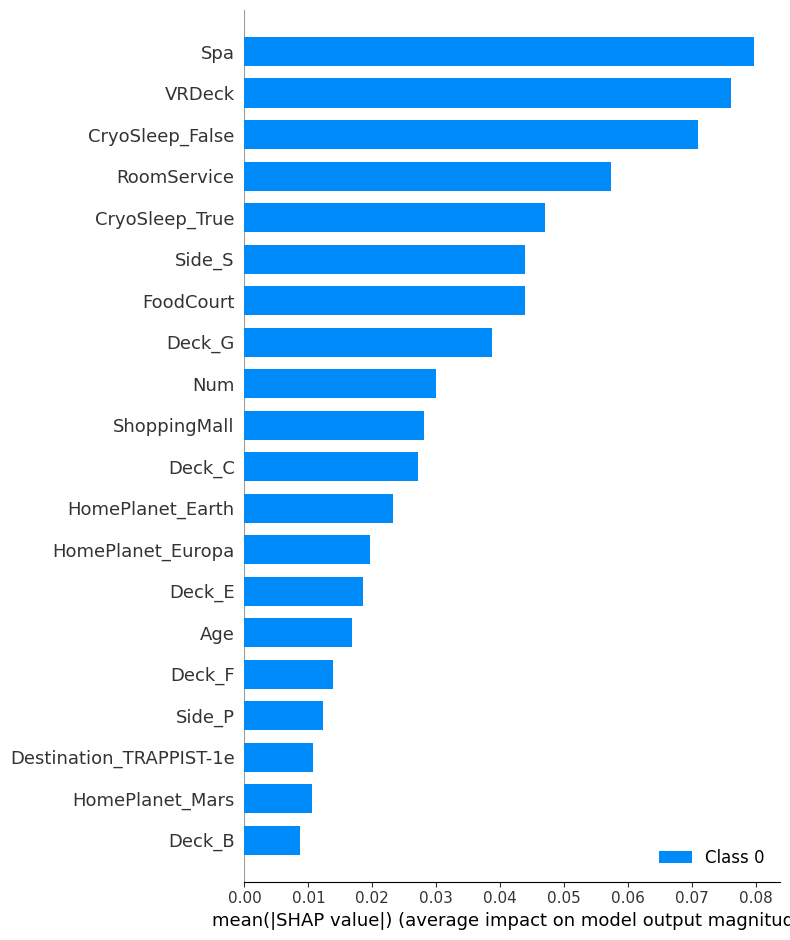

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.DeepExplainer(model_nn, X_train_scaled)

# Calculate SHAP values
shap_values = explainer.shap_values(X_val_scaled)

# Visualize the feature importance
shap.summary_plot(shap_values, X_val_scaled, feature_names=X_train.columns)

Feature Selection on the basis of Feature Importance

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a function to select the features based on SHAP values
selected_features_nn = [
    'Spa', 'RoomService', 'CryoSleep_False', 'VRDeck', 'CryoSleep_True',
    'Side_S', 'Deck_G', 'FoodCourt', 'Num', 'ShoppingMall',
    'Deck_C', 'HomePlanet_Europa', 'HomePlanet_Earth', 'Deck_E'
]

# Prepare the data with the selected features
X_train_selected_nn = X_train[selected_features_nn]
X_val_selected_nn = X_val[selected_features_nn]

# Scale the features using StandardScaler
scaler_nn = StandardScaler()
X_train_selected_scaled = scaler_nn.fit_transform(X_train_selected_nn)
X_val_selected_scaled = scaler_nn.transform(X_val_selected_nn)

# Neural network architecture with the selected features
model_nn_selected = Sequential()
model_nn_selected.add(Dense(128, activation='relu', input_shape=(X_train_selected_scaled.shape[1],)))
model_nn_selected.add(Dropout(0.2))
model_nn_selected.add(Dense(64, activation='relu'))
model_nn_selected.add(Dropout(0.2))
model_nn_selected.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model_nn_selected.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_selected = model_nn_selected.fit(
    X_train_selected_scaled, y_train,
    validation_data=(X_val_selected_scaled, y_val),
    epochs=10, batch_size=32
)

# Evaluate the model
val_loss_selected, val_accuracy_selected = model_nn_selected.evaluate(X_val_selected_scaled, y_val)
print(f'Validation Accuracy with selected features: {val_accuracy_selected}')

Epoch 1/10
208/208 [==============================] - 2s 4ms/step - loss: 0.4797 - accuracy: 0.7622 - val_loss: 0.4275 - val_accuracy: 0.7861
Epoch 2/10
208/208 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.7874 - val_loss: 0.4231 - val_accuracy: 0.7946
Epoch 3/10
208/208 [==============================] - 1s 3ms/step - loss: 0.4155 - accuracy: 0.7961 - val_loss: 0.4104 - val_accuracy: 0.8006
Epoch 4/10
208/208 [==============================] - 1s 4ms/step - loss: 0.4122 - accuracy: 0.8017 - val_loss: 0.4165 - val_accuracy: 0.7928
Epoch 5/10
208/208 [==============================] - 1s 4ms/step - loss: 0.4083 - accuracy: 0.8012 - val_loss: 0.4113 - val_accuracy: 0.7982
Epoch 6/10
208/208 [==============================] - 1s 4ms/step - loss: 0.4071 - accuracy: 0.8002 - val_loss: 0.4094 - val_accuracy: 0.8036
Epoch 7/10
208/208 [==============================] - 1s 4ms/step - loss: 0.4026 - accuracy: 0.8064 - val_loss: 0.4102 - val_accuracy: 0.8036
Epoch 

### Ensemble Method - Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Initialize the StackingClassifier
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions and evaluate
stacked_predictions = stacked_model.predict(X_val)
stacked_accuracy = accuracy_score(y_val, stacked_predictions)
print('Stacked Model Accuracy:', stacked_accuracy)

Stacked Model Accuracy: 0.7975903614457831


#### Tuning of the model

In [ ]:
# Adjusting hyperparameters of the base learners
rf_params = {'n_estimators': [150, 200], 'max_depth': [10, 20]}
svc_params = {'C': [0.5, 1], 'kernel': ['rbf', 'poly']}

# Updating the base learners with new parameters
base_learners = [
    ('rf', GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=3, n_jobs=-1)),
    ('svc', GridSearchCV(SVC(probability=True, random_state=42), param_grid=svc_params, cv=3, n_jobs=-1))
]

# Re-initialize and re-train the StackingClassifier
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacked_model.fit(X_train, y_train)

# Re-evaluate the stacked model
stacked_predictions = stacked_model.predict(X_val)
stacked_accuracy = accuracy_score(y_val, stacked_predictions)
print('Tuned Stacked Model Accuracy:', stacked_accuracy)

Tuned Stacked Model Accuracy: 0.8036144578313253


### Models final predictions (on the test set)

#### Preprocessing

In [ ]:
test_data_original = pd.read_csv('test.csv')

# Split 'Cabin' into 'Deck', 'Num', and 'Side'
test_data_original[['Deck','Num','Side']] = test_data_original['Cabin'].str.split('/', expand=True)
test_data_original.drop('Cabin', axis=1, inplace=True)

# Convert 'Num' column to numeric and handle NaNs
test_data_original['Num'] = pd.to_numeric(test_data_original['Num'], errors='coerce')
test_data_original['Num'].fillna(test_data_original['Num'].median(), inplace=True)

# Apply one-hot encoding
test_data_prepared = pd.get_dummies(test_data_original, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side'])

# Ensure the test data has the same columns as the training data
missing_cols = set(X_train.columns) - set(test_data_prepared.columns)
for c in missing_cols:
    test_data_prepared[c] = 0
test_data_prepared = test_data_prepared[X_train.columns]

# Handling NaN values in the test data
test_data_prepared = test_data_prepared.fillna(test_data_prepared.median())

# Re-check for any remaining NaN values
remaining_nan = test_data_prepared.isnull().sum().sum()
print('Remaining NaN values in test data:', remaining_nan)

Remaining NaN values in test data: 0


RandomForestClassifier

In [ ]:
# Final Predictions on Test Data

# Make final predictions using the tuned stacked model
final_predictions = best_model.predict(test_data_prepared)

# Prepare the final submission file
final_submission = pd.DataFrame({'PassengerId': test_data_original['PassengerId'], 'Transported': final_predictions})
final_submission['Transported'] = final_submission['Transported'].astype(bool)

# Save the final submission file
final_submission.to_csv('submission_rf.csv', index=False)

# Display the first few rows of the final submission file
display(final_submission.head())

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


Gradient Boosting

In [ ]:
# Final Predictions on Test Data

# Make final predictions using the tuned stacked model
final_predictions = gb_optimized.predict(test_data_prepared)

# Prepare the final submission file
final_submission = pd.DataFrame({'PassengerId': test_data_original['PassengerId'], 'Transported': final_predictions})
final_submission['Transported'] = final_submission['Transported'].astype(bool)

# Save the final submission file
final_submission.to_csv('submission_gb.csv', index=False)

# Display the first few rows of the final submission file
display(final_submission.head())

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


Neural Network

In [ ]:
# Scale the test data
X_test_scaled = scaler.transform(test_data_prepared)

# Make predictions on the test data
predictions = model_nn.predict(X_test_scaled)

# Convert predictions to binary (True/False)
predictions_binary = (predictions > 0.5).astype('bool').flatten()

# Prepare the submission file
submission = pd.DataFrame({'PassengerId': test_data_original['PassengerId'], 'Transported': predictions_binary})
submission.to_csv('submission_neural_network.csv', index=False)

# Display the first few rows of the submission file
display(submission.head())

Stacking

In [ ]:
# Final Predictions on Test Data

# Make final predictions using the tuned stacked model
final_predictions = stacked_model.predict(test_data_prepared)

# Prepare the final submission file
final_submission = pd.DataFrame({'PassengerId': test_data_original['PassengerId'], 'Transported': final_predictions})
final_submission['Transported'] = final_submission['Transported'].astype(bool)

# Save the final submission file
final_submission.to_csv('submission_stacking.csv', index=False)

# Display the first few rows of the final submission file
display(final_submission.head())

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


### All Evaluation metrics and Visualizations

52/52 [==============================] - 0s 2ms/step


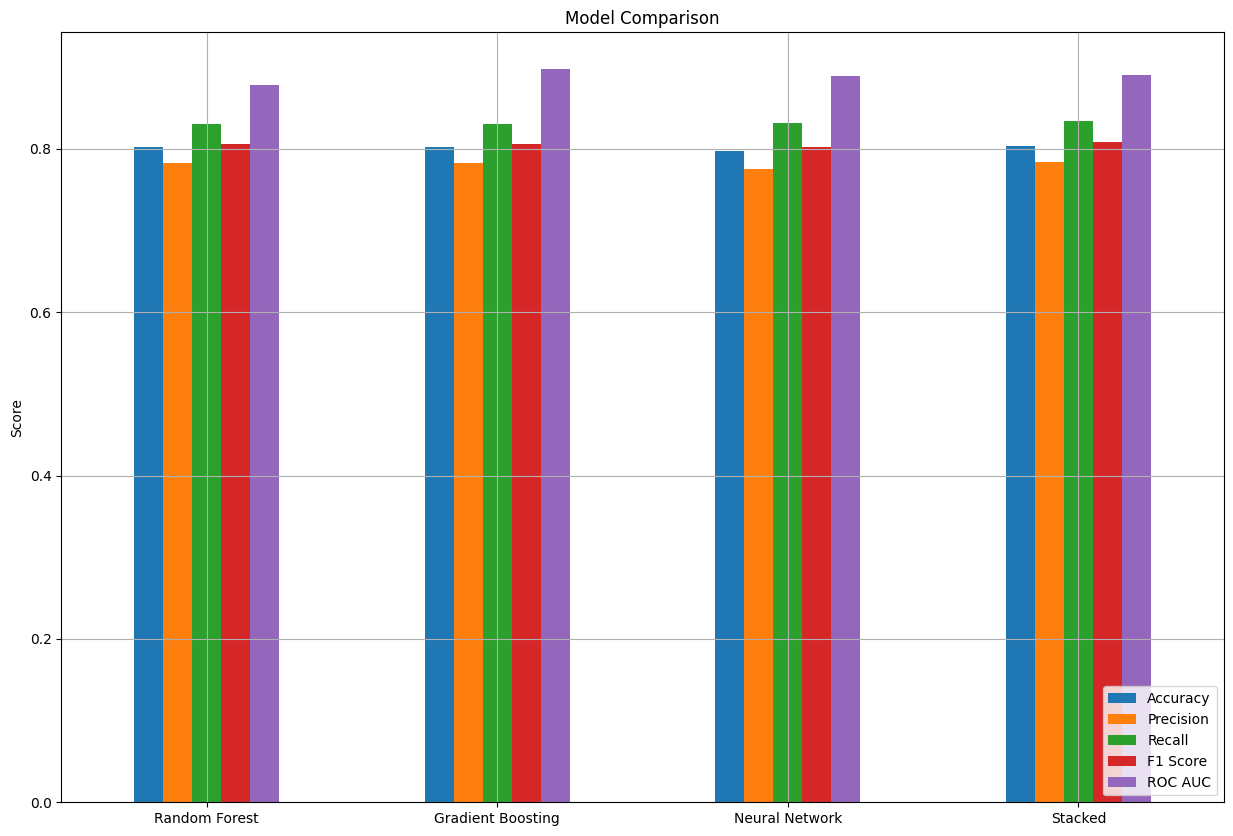

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_proba=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }
    if y_proba is not None:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_proba)
    return metrics

# Function to add metrics for a model
def add_model_metrics(model_name, y_true, y_pred, y_proba=None):
    model_metrics[model_name] = calculate_metrics(y_true, y_pred, y_proba)

model_metrics = {}

# RandomForestClassifier Metrics
rf_proba = best_model.predict_proba(X_val)[:, 1]
add_model_metrics('Random Forest', y_val, y_pred, rf_proba)

# GradientBoostingClassifier Metrics
gb_proba = gb_optimized.predict_proba(X_val)[:, 1]
add_model_metrics('Gradient Boosting', y_val, y_pred, gb_proba)

# Neural Network Metrics
# For the neural network, y_pred needs to be binarized since it outputs probabilities
nn_proba = model_nn.predict(X_val_scaled).ravel()
nn_pred = (nn_proba > 0.5).astype('int')
add_model_metrics('Neural Network', y_val, nn_pred, nn_proba)

# StackingClassifier Metrics
stacked_proba = stacked_model.predict_proba(X_val)[:, 1]
add_model_metrics('Stacked', y_val, stacked_predictions, stacked_proba)

# Visualize the metrics
metrics_df = pd.DataFrame(model_metrics).T
metrics_df.plot(kind='bar', figsize=(15, 10))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# For RandomForestClassifier
feature_importance_rf = best_model.feature_importances_

# For GradientBoostingClassifier
feature_importance_gb = gb_optimized.feature_importances_


In [ ]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model_nn, X_train_scaled)
shap_values = explainer(X_val_scaled)

# Summarize the SHAP values for each feature
feature_importance_nn = np.mean(np.abs(shap_values.values), axis=0)


PermutationExplainer explainer: 1661it [02:02, 12.80it/s]


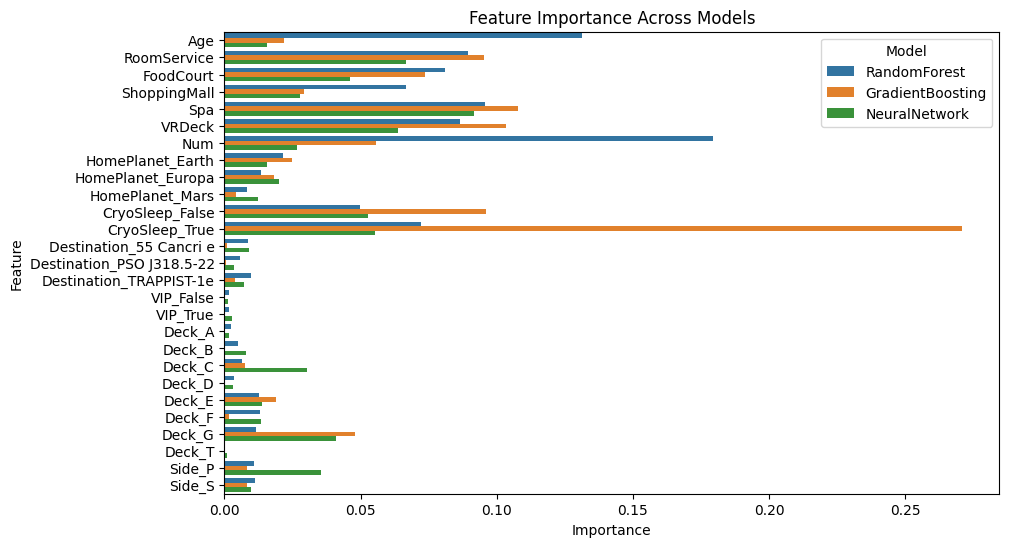

In [ ]:
import matplotlib.pyplot as plt

# Combine the feature importances into a single DataFrame
importances = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': feature_importance_rf,
    'GradientBoosting': feature_importance_gb,
    'NeuralNetwork': feature_importance_nn
})

# Melt the DataFrame for easy plotting
importances_melted = importances.melt(id_vars='Feature', var_name='Model', value_name='Importance')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Model', data=importances_melted)
plt.title('Feature Importance Across Models')
plt.show()
